# Plotting ILAMB Data
Generates global and zonal plots of observational data in ILAMB

In [1]:
import xarray as xr
import fates_calibration_library.ilamb_functions as ilamb

In [2]:
# use this dictionary to give information about the plots
obs_dict = {
      'ALBEDO': {
        'models': ['CERESed4.1', 'GEWEX.SRB'],
        'var': 'albedo',
        'varname': 'albedo',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': '0-1',
        'lat_units': '0-1',
        'cmap': 'jet',
        'diverging_cmap': False,
        },
      'BIOMASS': {
        'models': ['ESACCI', 'GEOCARBON'],
        'var': 'biomass',
        'varname': 'forest biomass',
        'convert_units': 'Tg',
        'conversion_factor': 0.01*1e-6,
        'global_units': 'MgC ha$^{-1}$',
        'lat_units': 'TgC',
        'cmap': 'YlGn',
        'diverging_cmap': False,
        },
      'BURNTAREA': {
        'models': ['GFED4.1S'],
        'var': 'burntarea',
        'varname': 'burned area',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': '%',
        'lat_units': '%',
        'cmap': 'Reds',
        'diverging_cmap': False,
      },
      'EF': {
        'models': ['FLUXCOM', 'CLASS', 'WECANN', 'GBAF'],
        'var': 'ef',
        'varname': 'evaporative fraction',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': '0-1',
        'lat_units': '0-1',
        'cmap': 'BrBG',
        'diverging_cmap': False,
      },
      'FIRE': {
        'models': ['CERESed4.1', 'GEWEX.SRB'],
        'var': 'fire',
        'varname': 'surface upward longwave radiation flux',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'W m$^{-2}$',
        'lat_units': 'W m$^{-2}$',
        'cmap': 'jet',
        'diverging_cmap': False,
      },
      'FSA': {
        'models': ['CERESed4.1', 'GEWEX.SRB'],
        'var': 'fsa',
        'varname': 'surface net shortwave radiation flux',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'W m$^{-2}$',
        'lat_units': 'W m$^{-2}$',
        'cmap': 'jet',
        'diverging_cmap': False,
      },
      'FSR': {
        'models': ['CERESed4.1', 'GEWEX.SRB'],
        'var': 'fsr',
        'varname': 'surface upward shortwave radiation flux',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'W m$^{-2}$',
        'lat_units': 'W m$^{-2}$',
        'cmap': 'jet',
        'diverging_cmap': False,
      },
      'GPP': {
        'models': ['FLUXCOM', 'WECANN', 'GBAF'],
        'var': 'gpp',
        'varname': 'GPP',
        'convert_units': 'PgC yr-1',
        'conversion_factor': 1e6*1e-12,
        'global_units': 'kgC m$^{-2}$ yr$^{-1}$',
        'lat_units': 'PgC yr$^{-1}$',
        'cmap': 'YlGn',
        'diverging_cmap': False,
      },
      'GR': {
        'models': ['CLASS'],
        'var': 'gr',
        'varname': 'ground heat flux',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'W m$^{-2}$',
        'lat_units': 'W m$^{-2}$',
        'cmap': 'Oranges',
        'diverging_cmap': False,
      },
      'LAI': {
        'models': ['AVHRR', 'AVH15C1'],
        'var': 'lai',
        'varname': 'LAI',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'm$^2$ m$^{-2}$',
        'lat_units': 'm$^2$ m$^{-2}$',
        'cmap': 'Oranges',
        'diverging_cmap': False,
      },
      'LE': {
        'models': ['FLUXCOM', 'DOLCE', 'CLASS', 'WECANN', 'GBAF'],
        'var': 'le',
        'varname': 'latent heat flux',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'W m$^{-2}$',
        'lat_units': 'W m$^{-2}$',
        'cmap': 'YlGnBu',
        'diverging_cmap': False,
      },
      'MRRO': {
        'models': ['LORA', 'CLASS'],
        'var': 'mrro',
        'varname': 'runoff',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'mm day$^{-1}$',
        'lat_units': 'mm day$^{-1}$',
        'cmap': 'Blues',
        'diverging_cmap': False,
      },
      'NEE': {
        'models': ['FLUXCOM'],
        'var': 'nee',
        'varname': 'NEE',
        'convert_units': 'PgC yr-1',
        'conversion_factor': 1e6*1e-12,
        'global_units': 'kgC m$^{-2}$ yr$^{-1}$',
        'lat_units': 'PgC yr$^{-1}$',
        'cmap': 'RdYlGn_r',
        'diverging_cmap': True,
      },
      'RLNS': {
        'models': ['CERESed4.1', 'GEWEX.SRB'],
        'var': 'rlns',
        'varname': 'surface net longwave radiation flux',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'W m$^{-2}$',
        'lat_units': 'W m$^{-2}$',
        'cmap': 'jet',
        'diverging_cmap': False,
      },
      'RN': {
        'models':  ['CERESed4.1', 'GEWEX.SRB', 'CLASS'],
        'var': 'rn',
        'varname': 'net radiation',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'W m$^{-2}$',
        'lat_units': 'W m$^{-2}$',
        'cmap': 'jet',
        'diverging_cmap': False,
      },
      'SH': {
        'models':  ['FLUXCOM', 'CLASS', 'WECANN', 'GBAF'],
        'varname': 'sh',
        'name': 'sensible heat flux',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'W m$^{-2}$',
        'lat_units': 'W m$^{-2}$',
        'cmap': 'jet',
        'diverging_cmap': False,
      },
      'SW': {
        'models':  ['WangMao'],
        'varname': 'sw',
        'name': 'soil water',
        'convert_units': '',
        'conversion_factor': None,
        'global_units': 'kg m$^{-2}$',
        'lat_units': 'kg m$^{-2}$',
        'cmap': 'Blues',
        'diverging_cmap': False,
      },
    }

In [3]:
# compiled ILAMB observational data
ILAMB_obs_file = '/glade/work/afoster/FATES_calibration/observations/all_ILAMB_obs.nc'
ILAMB_dat = xr.open_dataset(ILAMB_obs_file)

In [4]:
plotvar = 'MRRO'
attributes = obs_dict[plotvar]

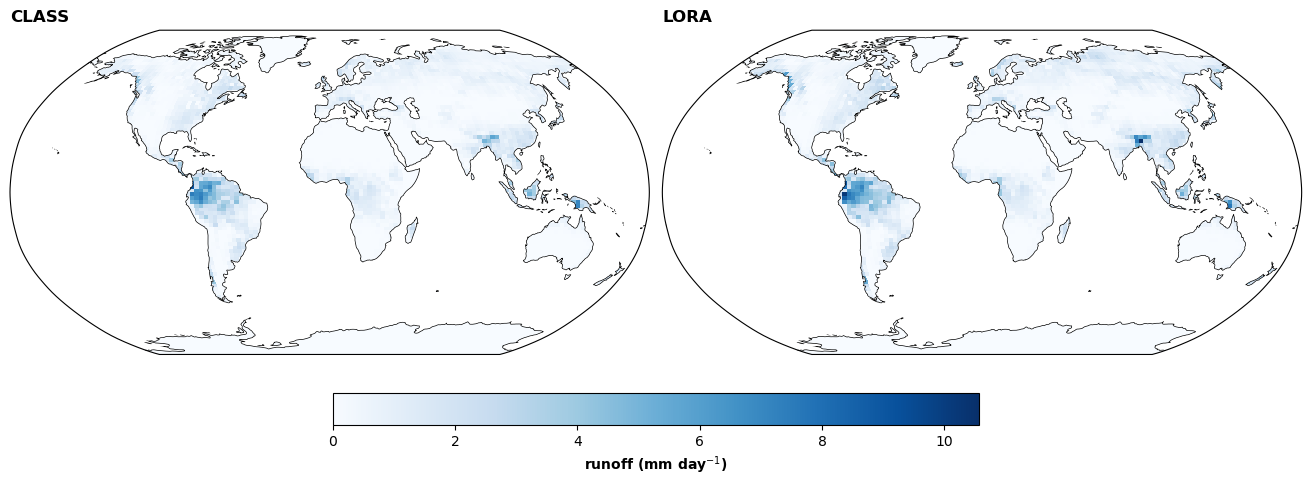

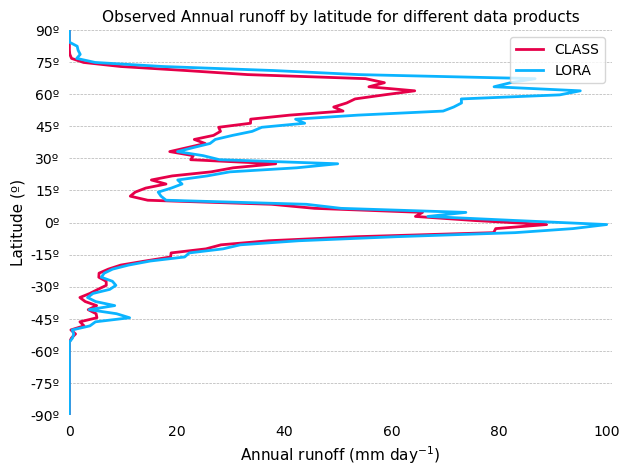

In [5]:
ilamb.plot_ilamb_var(ILAMB_dat, attributes['var'], obs_dict[plotvar])